In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, FuncFormatter

from scipy.special import erf

import torch
import torch.nn as nn
import torch.nn.functional as F

from time import time
from time import process_time

import math

In [2]:
# Run softmax iteratively 10 times on a linearly spaced dataset ranging from 0 to 1
N = 20
X = torch.linspace(0, 1, N)

num_iter = 10

softmax_iter_array = []

for _ in range(num_iter):
  X = torch.softmax(X, dim=0)
  softmax_iter_array.append(X)

In [3]:
# Calculate the standard devitations for each iteration
std_dev_array = []

for i in range(num_iter):
  std_dev = torch.std(softmax_iter_array[i])
  std_dev_array.append(std_dev)

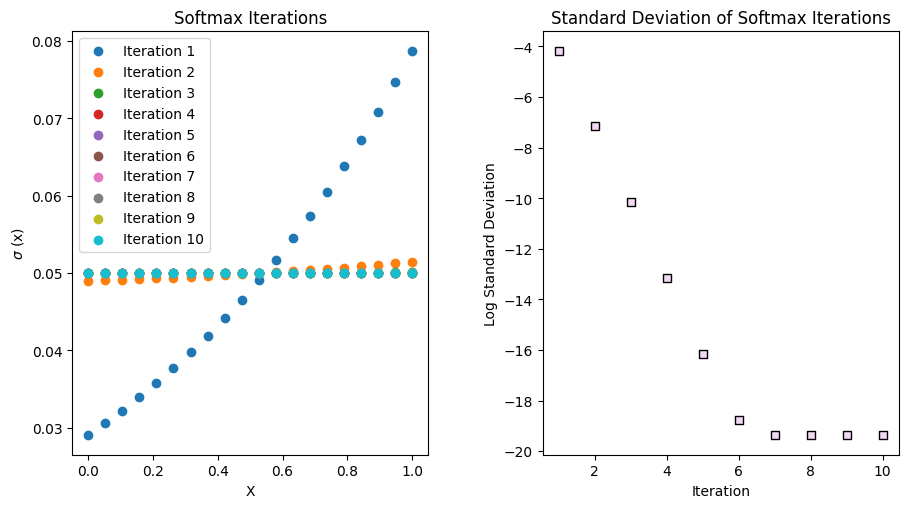

In [4]:
# Plot the softmax for each iteration

y = torch.linspace(0,1,N)

_,axs = plt.subplots(1,2,figsize=(10, 6))# Add figure sizing for better visualization

for i, x in enumerate(softmax_iter_array):
  axs[0].scatter(y, x, label=f'Iteration {i+1}')
  axs[0].legend()
  axs[0].set(xlabel='X', ylabel=r'$\sigma$ (x)', title='Softmax Iterations')

axs[1].scatter(range(1, num_iter+1), np.log(std_dev_array), edgecolors='black', facecolors=[.9,.7,.9,.5],marker='s')
axs[1].set(xlabel='Iteration', ylabel='Log Standard Deviation', title='Standard Deviation of Softmax Iterations')

plt.tight_layout(pad=4)
plt.show()

In [5]:
# Calculate the softmax with varying dataset sizes

ds_array = []

for _, ds_size in enumerate([4, 10,100]):
  X = torch.linspace(0, 1, ds_size)
  ds_array.append(F.softmax(X, dim=0))


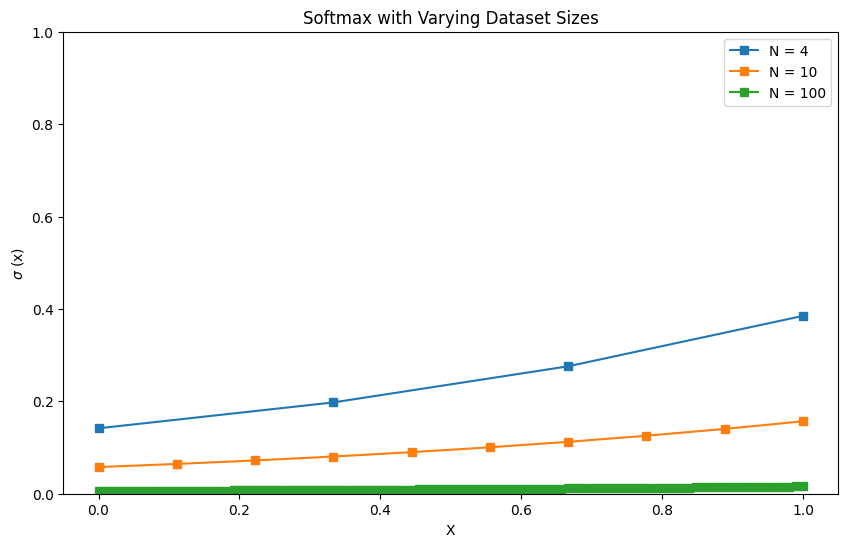

In [6]:
# Plot the softmax
plt.figure(figsize=(10, 6))

for i, x in enumerate(ds_array):
  y = torch.linspace(0,1,len(x))
  plt.plot(y, x, '-s',label=f'N = {len(x)}')
  plt.legend()

plt.xlabel('X')
plt.ylabel(r'$\sigma$ (x)')
plt.ylim(0, 1)
plt.title('Softmax with Varying Dataset Sizes')
plt.show()

## Impact of range and temperature on softmax distribution

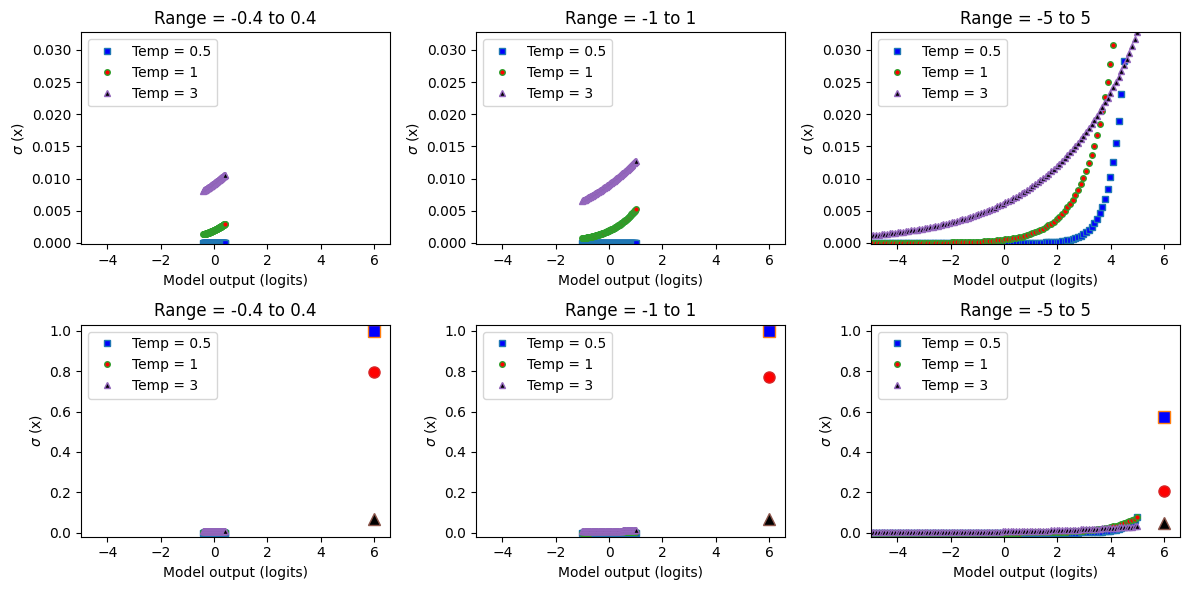

In [7]:
temps = [.5,1,3]
bounds = [.4,1,5]

colors = 'brk'
shapes = 'so^'

_, axs = plt.subplots(2,3, figsize=(12,6))

for i in range(3):

  logits = torch.linspace(-bounds[i], bounds[i], 100)
  logits = torch.cat((logits, torch.tensor([6])))

  for temp_idx in range(3):
    T = temps[temp_idx]
    softmax_manual = torch.exp(logits/T) / torch.sum(torch.exp(logits/T))

    for ii in range(2):
      axs[ii, i].plot(logits[:-1],softmax_manual[:-1],linestyle='none', markerfacecolor=colors[temp_idx], marker=shapes[temp_idx], markersize=4, label=f'Temp = {T}')
      axs[ii,i].plot(logits[-1], softmax_manual[-1], markerfacecolor=colors[temp_idx], marker=shapes[temp_idx], markersize=8)
      axs[ii,i].set_ylim(0,1)
      axs[ii,i].legend()
      axs[ii,i].set_title(f'Range = {-bounds[i]} to {bounds[i]}')

for a in axs[1,:]:
  a.set(xlim=[-bounds[-1],6.6], ylim=[-.02,1.03], xlabel='Model output (logits)', ylabel=r'$\sigma$ (x)')
  a.legend(loc='upper left')


for a in axs[0,:]:
  a.set(xlim=[-bounds[-1],6.6], ylim=[-.0002,softmax_manual[-2]], xlabel='Model output (logits)', ylabel=r'$\sigma$ (x)')
  a.legend(loc='upper left')

plt.tight_layout()
plt.show()
